In [90]:
import xgboost as xgb
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from dataProcessing import readData, prepareDataBasic

In [91]:
train, test = readData()

final = test.copy()

test['consumption'] = 0

In [92]:
train

time  temp  dwpt  rhum  prcp  snow   wdir  wspd  \
0     2021-09-01 00:00:00+03:00  11.2  10.3  94.0   NaN   NaN  320.0   7.2   
1     2021-09-01 01:00:00+03:00  10.7   9.6  93.0   NaN   NaN  320.0   7.2   
2     2021-09-01 02:00:00+03:00   9.9   9.0  94.0   NaN   NaN  320.0   7.2   
3     2021-09-01 03:00:00+03:00  10.0   8.4  90.0   NaN   NaN  330.0   7.2   
4     2021-09-01 04:00:00+03:00   9.0   8.1  94.0   NaN   NaN  300.0   3.6   
...                         ...   ...   ...   ...   ...   ...    ...   ...   
8587  2022-08-24 19:00:00+03:00  27.1  17.0  54.0   0.0   NaN  180.0   4.0   
8588  2022-08-24 20:00:00+03:00  25.1  17.1  61.0   0.0   NaN  220.0   6.0   
8589  2022-08-24 21:00:00+03:00  24.9  18.1  66.0   0.0   NaN  150.0   4.0   
8590  2022-08-24 22:00:00+03:00  22.1  17.0  73.0   0.0   NaN  160.0   6.0   
8591  2022-08-24 23:00:00+03:00  22.1  18.1  78.0   0.0   NaN  310.0  15.0   

      wpgt    pres  coco  el_price  consumption  
0     16.7  1012.6   2.0   0.09016        0.577  
1     13.0  1012.6   2.0   0.09251        0.594  
2     13.0  1012.2   2.0   0.08890        0.685  
3     13.0  1011.9   1.0   0.08735        1.016  
4     13.0  1011.4   2.0   0.08688        0.677  
...    ...     ...   ...       ...          ...  
8587  11.1  1020.0   2.0   0.53494        0.678  
8588  11.1  1021.0   1.0   0.49990        0.457  
8589   9.3  1020.9   4.0   0.43149        0.500  
8590   9.3  1021.0   2.0   0.55203        2.321  
8591   9.3  1021.0   2.0   0.43108        0.678  

[8592 rows x 13 columns]

In [93]:
train = prepareDataBasic(train)
test = prepareDataBasic(test)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [94]:
train = train[3200:]

In [95]:
xgbModels7D = []
predictions7D = []

for i in range(7):

    _train = train[(train['weekday'] == i)]

    model_train, model_test = train_test_split(_train, test_size = 0.05)

    d_train = xgb.DMatrix(model_train.drop(columns=['consumption']), model_train['consumption'])
    d_test = xgb.DMatrix(model_test.drop(columns=['consumption']), model_test['consumption'])

    xgb_params = {'nthread': -1, 'learning_rate': 0.0005, 'max_depth': 24, 'min_child_weight': 1, 'subsample': 0.8, 'alpha': 0.7, 'lambda': 0.7, 'eval_metric': 'rmse'}

    watchlist = [(d_train, 'train'), (d_test, 'val')]

    print(f"Training for day {i}")

    #verbose_eval=False

    xgbModel = xgb.train(xgb_params, d_train, 500000, watchlist, early_stopping_rounds = 50, verbose_eval=5000)

    xgbModels7D.append(xgbModel)

Training for day 0
[0]	train-rmse:0.98213	val-rmse:0.69229
[1894]	train-rmse:0.54668	val-rmse:0.52359
Training for day 1
[0]	train-rmse:0.96490	val-rmse:0.88495
[5000]	train-rmse:0.28819	val-rmse:0.64774
[5059]	train-rmse:0.28531	val-rmse:0.64787
Training for day 2
[0]	train-rmse:1.24417	val-rmse:0.81748
[3491]	train-rmse:0.44263	val-rmse:0.56871
Training for day 3
[0]	train-rmse:1.11105	val-rmse:0.69470
[3482]	train-rmse:0.42246	val-rmse:0.44964
Training for day 4
[0]	train-rmse:0.94801	val-rmse:1.50306
[5000]	train-rmse:0.28837	val-rmse:0.87741
[10000]	train-rmse:0.15635	val-rmse:0.73036
[15000]	train-rmse:0.10936	val-rmse:0.69108
[20000]	train-rmse:0.08886	val-rmse:0.67833
[25000]	train-rmse:0.07810	val-rmse:0.67436
[25149]	train-rmse:0.07786	val-rmse:0.67431
Training for day 5
[0]	train-rmse:1.25163	val-rmse:0.69681
[3282]	train-rmse:0.50422	val-rmse:0.45773
Training for day 6
[0]	train-rmse:1.37353	val-rmse:1.57189
[5000]	train-rmse:0.36523	val-rmse:1.17356
[10000]	train-rmse:0.17

In [96]:
predictionsOverTrain = []

_train = train.copy().drop(columns=['consumption'])

_train = _train.reset_index(drop=True)


In [97]:
_train

temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  coco  el_price  \
0    -15.3  40.0  84.0   0.0   0.0  190.0   7.2  14.8  1032.6   2.0   0.21225   
1    -14.0  40.0  84.0   0.0   0.0  190.0   7.2  14.8  1031.9   2.0   0.21227   
2    -12.7  40.0  85.0   0.0   0.0  190.0   7.2  16.7  1031.8   2.0   0.21226   
3    -10.9  40.0  85.0   0.0   0.0  200.0   7.2  16.7  1030.7   2.0   0.21223   
4    -10.0  40.0  84.0   0.0   0.0  200.0   7.2  16.7  1030.1   4.0   0.21199   
...    ...   ...   ...   ...   ...    ...   ...   ...     ...   ...       ...   
5385  27.1  17.0  54.0   0.0   0.0  180.0   4.0  11.1  1020.0   2.0   0.53494   
5386  25.1  17.1  61.0   0.0   0.0  220.0   6.0  11.1  1021.0   1.0   0.49990   
5387  24.9  18.1  66.0   0.0   0.0  150.0   4.0   9.3  1020.9   4.0   0.43149   
5388  22.1  17.0  73.0   0.0   0.0  160.0   6.0   9.3  1021.0   2.0   0.55203   
5389  22.1  18.1  78.0   0.0   0.0  310.0  15.0   9.3  1021.0   2.0   0.43108   

      year  weekday  dayofyear  day  month  hour  
0     2022        2         12   12      1     8  
1     2022        2         12   12      1     9  
2     2022        2         12   12      1    10  
3     2022        2         12   12      1    11  
4     2022        2         12   12      1    12  
...    ...      ...        ...  ...    ...   ...  
5385  2022        2        236   24      8    19  
5386  2022        2        236   24      8    20  
5387  2022        2        236   24      8    21  
5388  2022        2        236   24      8    22  
5389  2022        2        236   24      8    23  

[5390 rows x 17 columns]

In [98]:
for i, row in _train.iterrows():

    try:

        good_model = xgbModels7D[int(row.weekday)]

        prediction = good_model.predict(xgb.DMatrix(_train.iloc[[i]]))

        predictionsOverTrain.append(prediction[0])
    
    except:

        print(f"Something went wrong. i={i}")

In [99]:
train['prediction'] = pd.array(predictionsOverTrain)

In [100]:
train

temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  coco  el_price  \
3200 -15.3  40.0  84.0   0.0   0.0  190.0   7.2  14.8  1032.6   2.0   0.21225   
3201 -14.0  40.0  84.0   0.0   0.0  190.0   7.2  14.8  1031.9   2.0   0.21227   
3202 -12.7  40.0  85.0   0.0   0.0  190.0   7.2  16.7  1031.8   2.0   0.21226   
3203 -10.9  40.0  85.0   0.0   0.0  200.0   7.2  16.7  1030.7   2.0   0.21223   
3204 -10.0  40.0  84.0   0.0   0.0  200.0   7.2  16.7  1030.1   4.0   0.21199   
...    ...   ...   ...   ...   ...    ...   ...   ...     ...   ...       ...   
8585  27.1  17.0  54.0   0.0   0.0  180.0   4.0  11.1  1020.0   2.0   0.53494   
8586  25.1  17.1  61.0   0.0   0.0  220.0   6.0  11.1  1021.0   1.0   0.49990   
8587  24.9  18.1  66.0   0.0   0.0  150.0   4.0   9.3  1020.9   4.0   0.43149   
8588  22.1  17.0  73.0   0.0   0.0  160.0   6.0   9.3  1021.0   2.0   0.55203   
8589  22.1  18.1  78.0   0.0   0.0  310.0  15.0   9.3  1021.0   2.0   0.43108   

      consumption  year  weekday  dayofyear  day  month  hour  prediction  
3200        1.447  2022        2         12   12      1     8    1.029608  
3201        0.973  2022        2         12   12      1     9    0.982198  
3202        1.282  2022        2         12   12      1    10    1.024863  
3203        1.049  2022        2         12   12      1    11    1.007832  
3204        1.162  2022        2         12   12      1    12     1.00329  
...           ...   ...      ...        ...  ...    ...   ...         ...  
8585        0.678  2022        2        236   24      8    19    0.733405  
8586        0.457  2022        2        236   24      8    20    0.592003  
8587        0.500  2022        2        236   24      8    21    0.549662  
8588        2.321  2022        2        236   24      8    22    1.458413  
8589        0.678  2022        2        236   24      8    23    0.535859  

[5390 rows x 19 columns]

<AxesSubplot: >

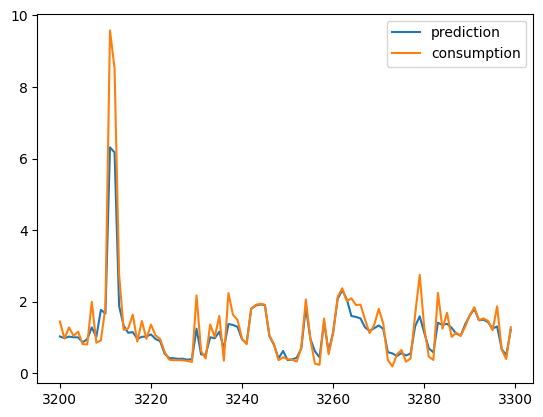

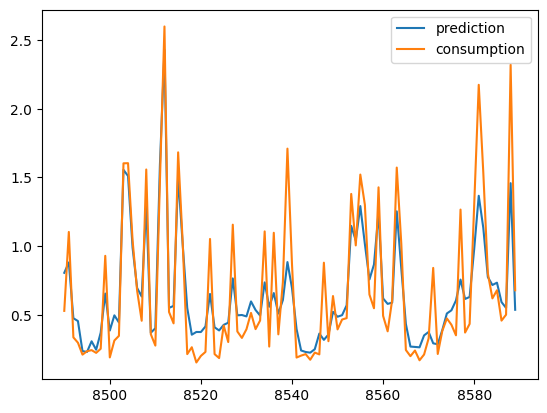

In [101]:
chart = pd.DataFrame(train[['prediction', 'consumption']])


chart[:100].plot.line()


chart[-100:].plot.line()

In [102]:
predictions = []

for i, row in test.iterrows():
        
        good_model = xgbModels7D[int(row.weekday)]

        prediction = good_model.predict(xgb.DMatrix(test.iloc[[i]].drop(columns=['consumption'])))

        predictions.append(prediction)

final['consumption'] = pd.DataFrame(predictions)

final = final[['time', 'consumption']]

final.to_csv('submission.csv', index=False)

print('Successfull save!')

Successfull save!
